In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-las-vegas-listings/las_vegas_airbnb_data.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
las_vegas_airbnb = pd.read_csv('/kaggle/input/airbnb-las-vegas-listings/las_vegas_airbnb_data.csv')

In [4]:
las_vegas_airbnb.head(10)

,roomType,stars,address,numberOfGuests,primaryHost/smartName,price,firstReviewComments,firstReviewRating
0,Entire condo,4.54,"Las Vegas, Nevada, United States",4,Doug,NaN,"Overall, I had a good experience. The only dow...",4.0
1,Entire rental unit,4.39,"Las Vegas, Nevada, United States",4,Doug,NaN,I stayed an extra night. That should sum it up...,5.0
2,Entire guest suite,NaN,"Las Vegas, Nevada, United States",4,Aaron&Tina,NaN,These days things are so impersonable but she ...,5.0
3,Entire condo,NaN,"Las Vegas, Nevada, United States",6,Aaron&Tina,NaN,Great response time from owner. Could message ...,5.0
4,Private room in home,4.51,"Las Vegas, Nevada, United States",2,Brad,NaN,good group of guys in the house. quiet clean a...,5.0
5,Entire home,4.96,"Las Vegas, Nevada, United States",15,Simon,NaN,Great spot. Visited for a Bach party and the p...,5.0
6,Room in hotel,NaN,"Las Vegas, Nevada, United States",4,Suiteness,NaN,NaN,NaN
7,Entire home,5.00,"Las Vegas, Nevada, United States",16,Totalmax,NaN,Great place to stay for a big group! Everyone ...,5.0
8,Room in hotel,NaN,"Las Vegas, Nevada, United States",8,888,NaN,NaN,NaN
9,Room in hotel,NaN,"Las Vegas, Nevada, United States",4,888,NaN,NaN,NaN


In [5]:
las_vegas_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   roomType               1000 non-null   object 
 1   stars                  723 non-null    float64
 2   address                1000 non-null   object 
 3   numberOfGuests         1000 non-null   int64  
 4   primaryHost/smartName  1000 non-null   object 
 5   price                  0 non-null      float64
 6   firstReviewComments    795 non-null    object 
 7   firstReviewRating      795 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [6]:
# Data Cleaning

In [7]:
missing_values = las_vegas_airbnb.iloc[:, :10].isnull().sum()

missing_values

roomType                    0
stars                     277
address                     0
numberOfGuests              0
primaryHost/smartName       0
price                    1000
firstReviewComments       205
firstReviewRating         205
dtype: int64

In [8]:
# Remove duplicate values
las_vegas_airbnb = las_vegas_airbnb.drop_duplicates()

In [9]:
las_vegas_airbnb

,roomType,stars,address,numberOfGuests,primaryHost/smartName,price,firstReviewComments,firstReviewRating
0,Entire condo,4.54,"Las Vegas, Nevada, United States",4,Doug,NaN,"Overall, I had a good experience. The only dow...",4.0
1,Entire rental unit,4.39,"Las Vegas, Nevada, United States",4,Doug,NaN,I stayed an extra night. That should sum it up...,5.0
2,Entire guest suite,NaN,"Las Vegas, Nevada, United States",4,Aaron&Tina,NaN,These days things are so impersonable but she ...,5.0
3,Entire condo,NaN,"Las Vegas, Nevada, United States",6,Aaron&Tina,NaN,Great response time from owner. Could message ...,5.0
4,Private room in home,4.51,"Las Vegas, Nevada, United States",2,Brad,NaN,good group of guys in the house. quiet clean a...,5.0
...,...,...,...,...,...,...,...,...
994,Entire condo,4.86,"Las Vegas, Nevada, United States",4,Michelle,NaN,Great value and walking distance to MGM and st...,5.0
995,Entire condo,5.00,"Las Vegas, Nevada, United States",4,Rich,NaN,First time doing a long term rental. The bar w...,5.0
996,Entire home,4.77,"Henderson, Nevada, United States",7,Hostit,NaN,"This is my 2nd time staying here, great house,...",5.0
997,Entire condo,4.93,"Lake Las Vegas, Henderson, Nevada, United States",2,Cece,NaN,Really nice little studio! I spent a month her...,5.0


In [11]:
# Fill all NaN values with 0 

las_vegas_airbnb_filled = las_vegas_airbnb.fillna(0)

print(las_vegas_airbnb_filled)

                 roomType  stars  \
0            Entire condo   4.54   
1      Entire rental unit   4.39   
2      Entire guest suite   0.00   
3            Entire condo   0.00   
4    Private room in home   4.51   
..                    ...    ...   
994          Entire condo   4.86   
995          Entire condo   5.00   
996           Entire home   4.77   
997          Entire condo   4.93   
998           Entire home   5.00   

                                              address  numberOfGuests  \
0                    Las Vegas, Nevada, United States               4   
1                    Las Vegas, Nevada, United States               4   
2                    Las Vegas, Nevada, United States               4   
3                    Las Vegas, Nevada, United States               6   
4                    Las Vegas, Nevada, United States               2   
..                                                ...             ...   
994                  Las Vegas, Nevada, United States   

In [12]:
# Recheck missing value

missing_values = las_vegas_airbnb_filled.iloc[:, :10].isnull().sum()

missing_values

roomType                 0
stars                    0
address                  0
numberOfGuests           0
primaryHost/smartName    0
price                    0
firstReviewComments      0
firstReviewRating        0
dtype: int64

In [13]:
# The data have been cleaned and save to new csv

las_vegas_airbnb_filled.to_csv('/kaggle/working/newlasvegaslistings.csv', index=False)

In [14]:
las_vegas_airbnb_filled

,roomType,stars,address,numberOfGuests,primaryHost/smartName,price,firstReviewComments,firstReviewRating
0,Entire condo,4.54,"Las Vegas, Nevada, United States",4,Doug,0.0,"Overall, I had a good experience. The only dow...",4.0
1,Entire rental unit,4.39,"Las Vegas, Nevada, United States",4,Doug,0.0,I stayed an extra night. That should sum it up...,5.0
2,Entire guest suite,0.00,"Las Vegas, Nevada, United States",4,Aaron&Tina,0.0,These days things are so impersonable but she ...,5.0
3,Entire condo,0.00,"Las Vegas, Nevada, United States",6,Aaron&Tina,0.0,Great response time from owner. Could message ...,5.0
4,Private room in home,4.51,"Las Vegas, Nevada, United States",2,Brad,0.0,good group of guys in the house. quiet clean a...,5.0
...,...,...,...,...,...,...,...,...
994,Entire condo,4.86,"Las Vegas, Nevada, United States",4,Michelle,0.0,Great value and walking distance to MGM and st...,5.0
995,Entire condo,5.00,"Las Vegas, Nevada, United States",4,Rich,0.0,First time doing a long term rental. The bar w...,5.0
996,Entire home,4.77,"Henderson, Nevada, United States",7,Hostit,0.0,"This is my 2nd time staying here, great house,...",5.0
997,Entire condo,4.93,"Lake Las Vegas, Henderson, Nevada, United States",2,Cece,0.0,Really nice little studio! I spent a month her...,5.0


In [38]:
# Check data in deeper

In [29]:
las_vegas_airbnb_filled['roomType'].value_counts()

roomType
Room in hotel           3
Entire condo            2
Entire home             2
Entire rental unit      1
Entire guest suite      1
Private room in home    1
Name: count, dtype: int64

In [30]:
las_vegas_airbnb_filled['stars'].value_counts()

stars
4.54    1
4.39    1
4.51    1
4.96    1
5.00    1
Name: count, dtype: int64

In [31]:
las_vegas_airbnb_filled['address'].value_counts()

address
Las Vegas, Nevada, United States    10
Name: count, dtype: int64

In [37]:
las_vegas_airbnb_filled['numberOfGuests'].value_counts()

numberOfGuests
4     5
6     1
2     1
15    1
16    1
8     1
Name: count, dtype: int64

In [35]:
las_vegas_airbnb_filled['primaryHost/smartName'].value_counts()

primaryHost/smartName
Doug          2
Aaron&Tina    2
888           2
Brad          1
Simon         1
Suiteness     1
Totalmax      1
Name: count, dtype: int64

In [32]:
las_vegas_airbnb_filled['price'].value_counts()

Series([], Name: count, dtype: int64)

In [28]:
las_vegas_airbnb_filled['firstReviewComments'].value_counts()

firstReviewComments
Overall, I had a good experience. The only downside would be that check in was a bit difficult. We got to the location we were sent, and was told at the gate that we were at the wrong location. After messaging the host, he let us know we would be going to a different location. After a long day of traveling, it was very inconvenient that we went to the wrong location. A little bit more communication would've went a long way. Also, some type of early check in or bag drop off would've helped a lot. We were told by a lot of people from the area that it is common for the flights that the times are very weird. You either are coming into Vegas very early in the morning or late at night. It was difficult finding flights close to check in. The apartment did not match the pictures at all; appeared to be a different unit. Could use a slight spruce up of fixing things around the condo. Furniture seemed a little old and worn.    1
I stayed an extra night. That should sum it up. 

In [34]:
las_vegas_airbnb_filled['firstReviewRating'].value_counts()

firstReviewRating
5.0    6
4.0    1
Name: count, dtype: int64

In [36]:
las_vegas_airbnb_filled['pricePerGuest'].value_counts()

Series([], Name: count, dtype: int64)

In [25]:
print(las_vegas_airbnb_filled.columns)

Index(['roomType', 'stars', 'address', 'numberOfGuests',
       'primaryHost/smartName', 'price', 'firstReviewComments',
       'firstReviewRating', 'pricePerGuest'],
      dtype='object')


In [15]:
# Data Visualization

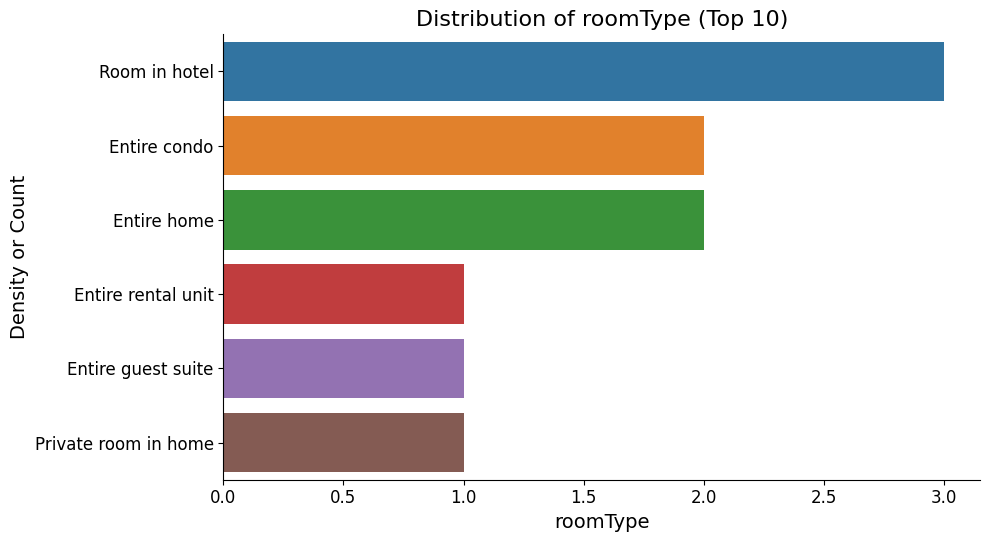

/tmp/ipykernel_33/1913837865.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_col, shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


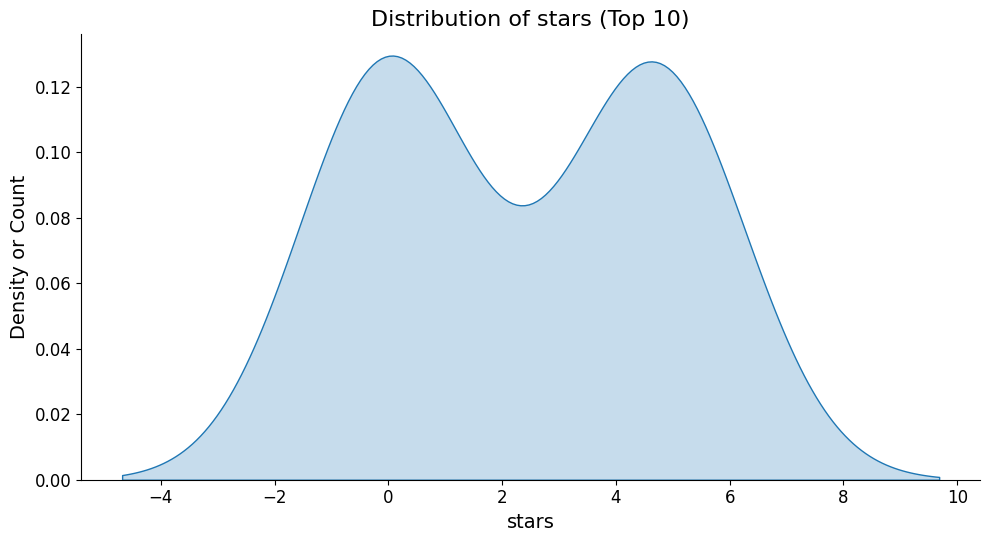

Column address has a single unique value or less in the first 10 entries.


/tmp/ipykernel_33/1913837865.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_col, shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


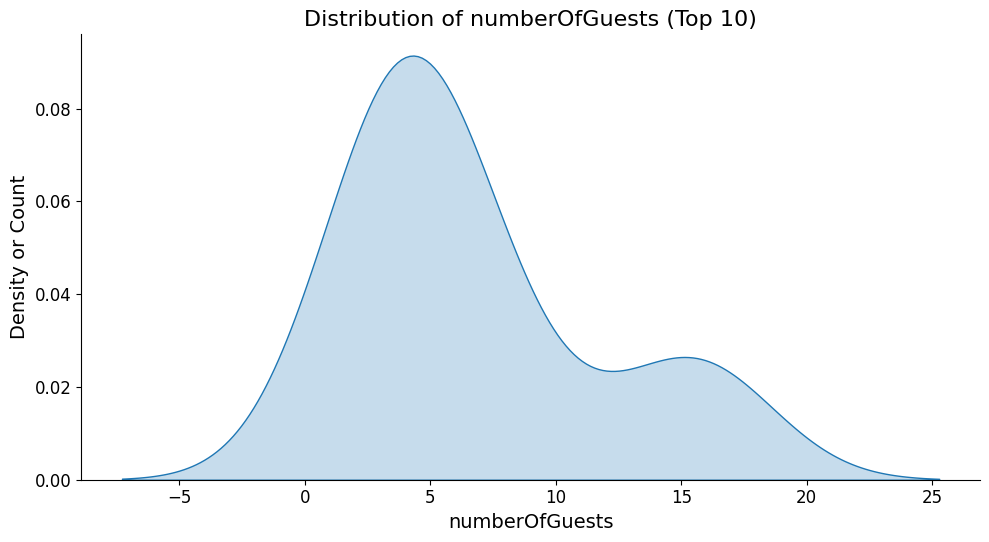

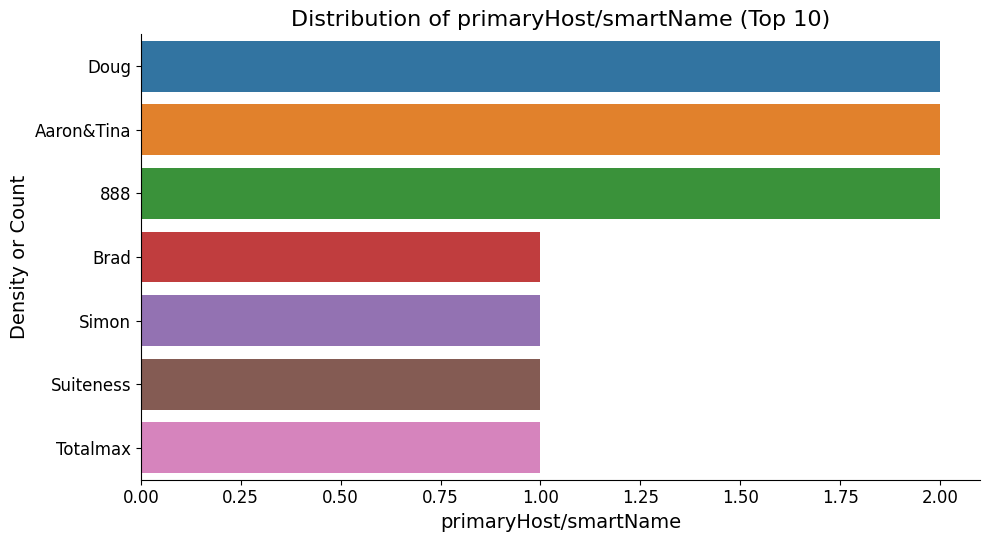

Column price has a single unique value or less in the first 10 entries.


/tmp/ipykernel_33/1913837865.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(numeric_col, shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


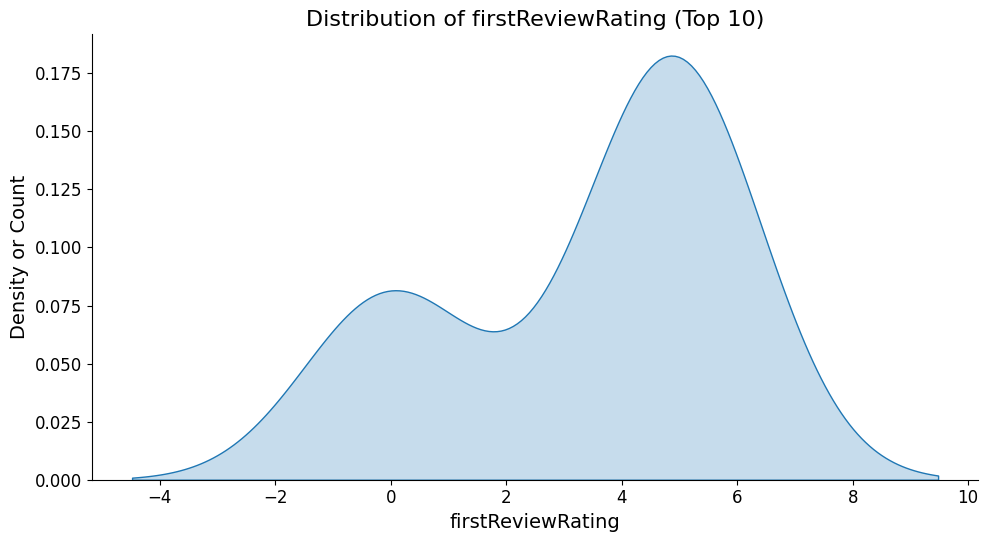

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load your actual Las Vegas Airbnb data
data = pd.read_csv('/kaggle/working/newlasvegaslistings.csv')
df = pd.DataFrame(data)

# Data visualization tailored to column type, excluding 'firstReviewComments'
for col in df.columns:
    if col == 'firstReviewComments':  # Skip the 'firstReviewComments' column
        continue

    if len(df[col].head(10).unique()) <= 1:
        print(f"Column {col} has a single unique value or less in the first 10 entries.")
        continue

    plt.figure(figsize=(10, 6))  # Slightly larger figure size for better readability

    if df[col].dtype == 'object' or isinstance(df[col].dtype, pd.CategoricalDtype):
        sns.countplot(y=col, data=df.head(10), order=df.head(10)[col].value_counts().index)
    elif pd.api.types.is_numeric_dtype(df[col]):
        numeric_col = pd.to_numeric(df[col].head(10), errors='coerce')
        if numeric_col.isnull().all():
            print(f"Column {col} contains non-numeric data.")
            continue
        sns.kdeplot(numeric_col, shade=True)
    else:
        print(f"Skipping column {col} as it is not suitable for direct plotting.")
        continue

    plt.title(f'Distribution of {col} (Top 10)', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density or Count', fontsize=14)

    sns.despine()
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjusted layout parameters
    plt.show()